In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
cal_data = pd.read_csv('calories.csv')

In [3]:
cal_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
ex_data = pd.read_csv('exercise.csv')

In [5]:
ex_data


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [11]:
new_data = pd.concat([cal_data['Calories'],ex_data],axis=1)

In [12]:
new_data

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,45.0,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [13]:
new_data['Gender']=new_data['Gender'].astype('category')

In [14]:

new_data['Gender'] = new_data['Gender'].cat.rename_categories({'male': 0, 'female': 1})

In [15]:
new_data.head(
)

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


In [16]:
corr = new_data.corr()

<AxesSubplot:>

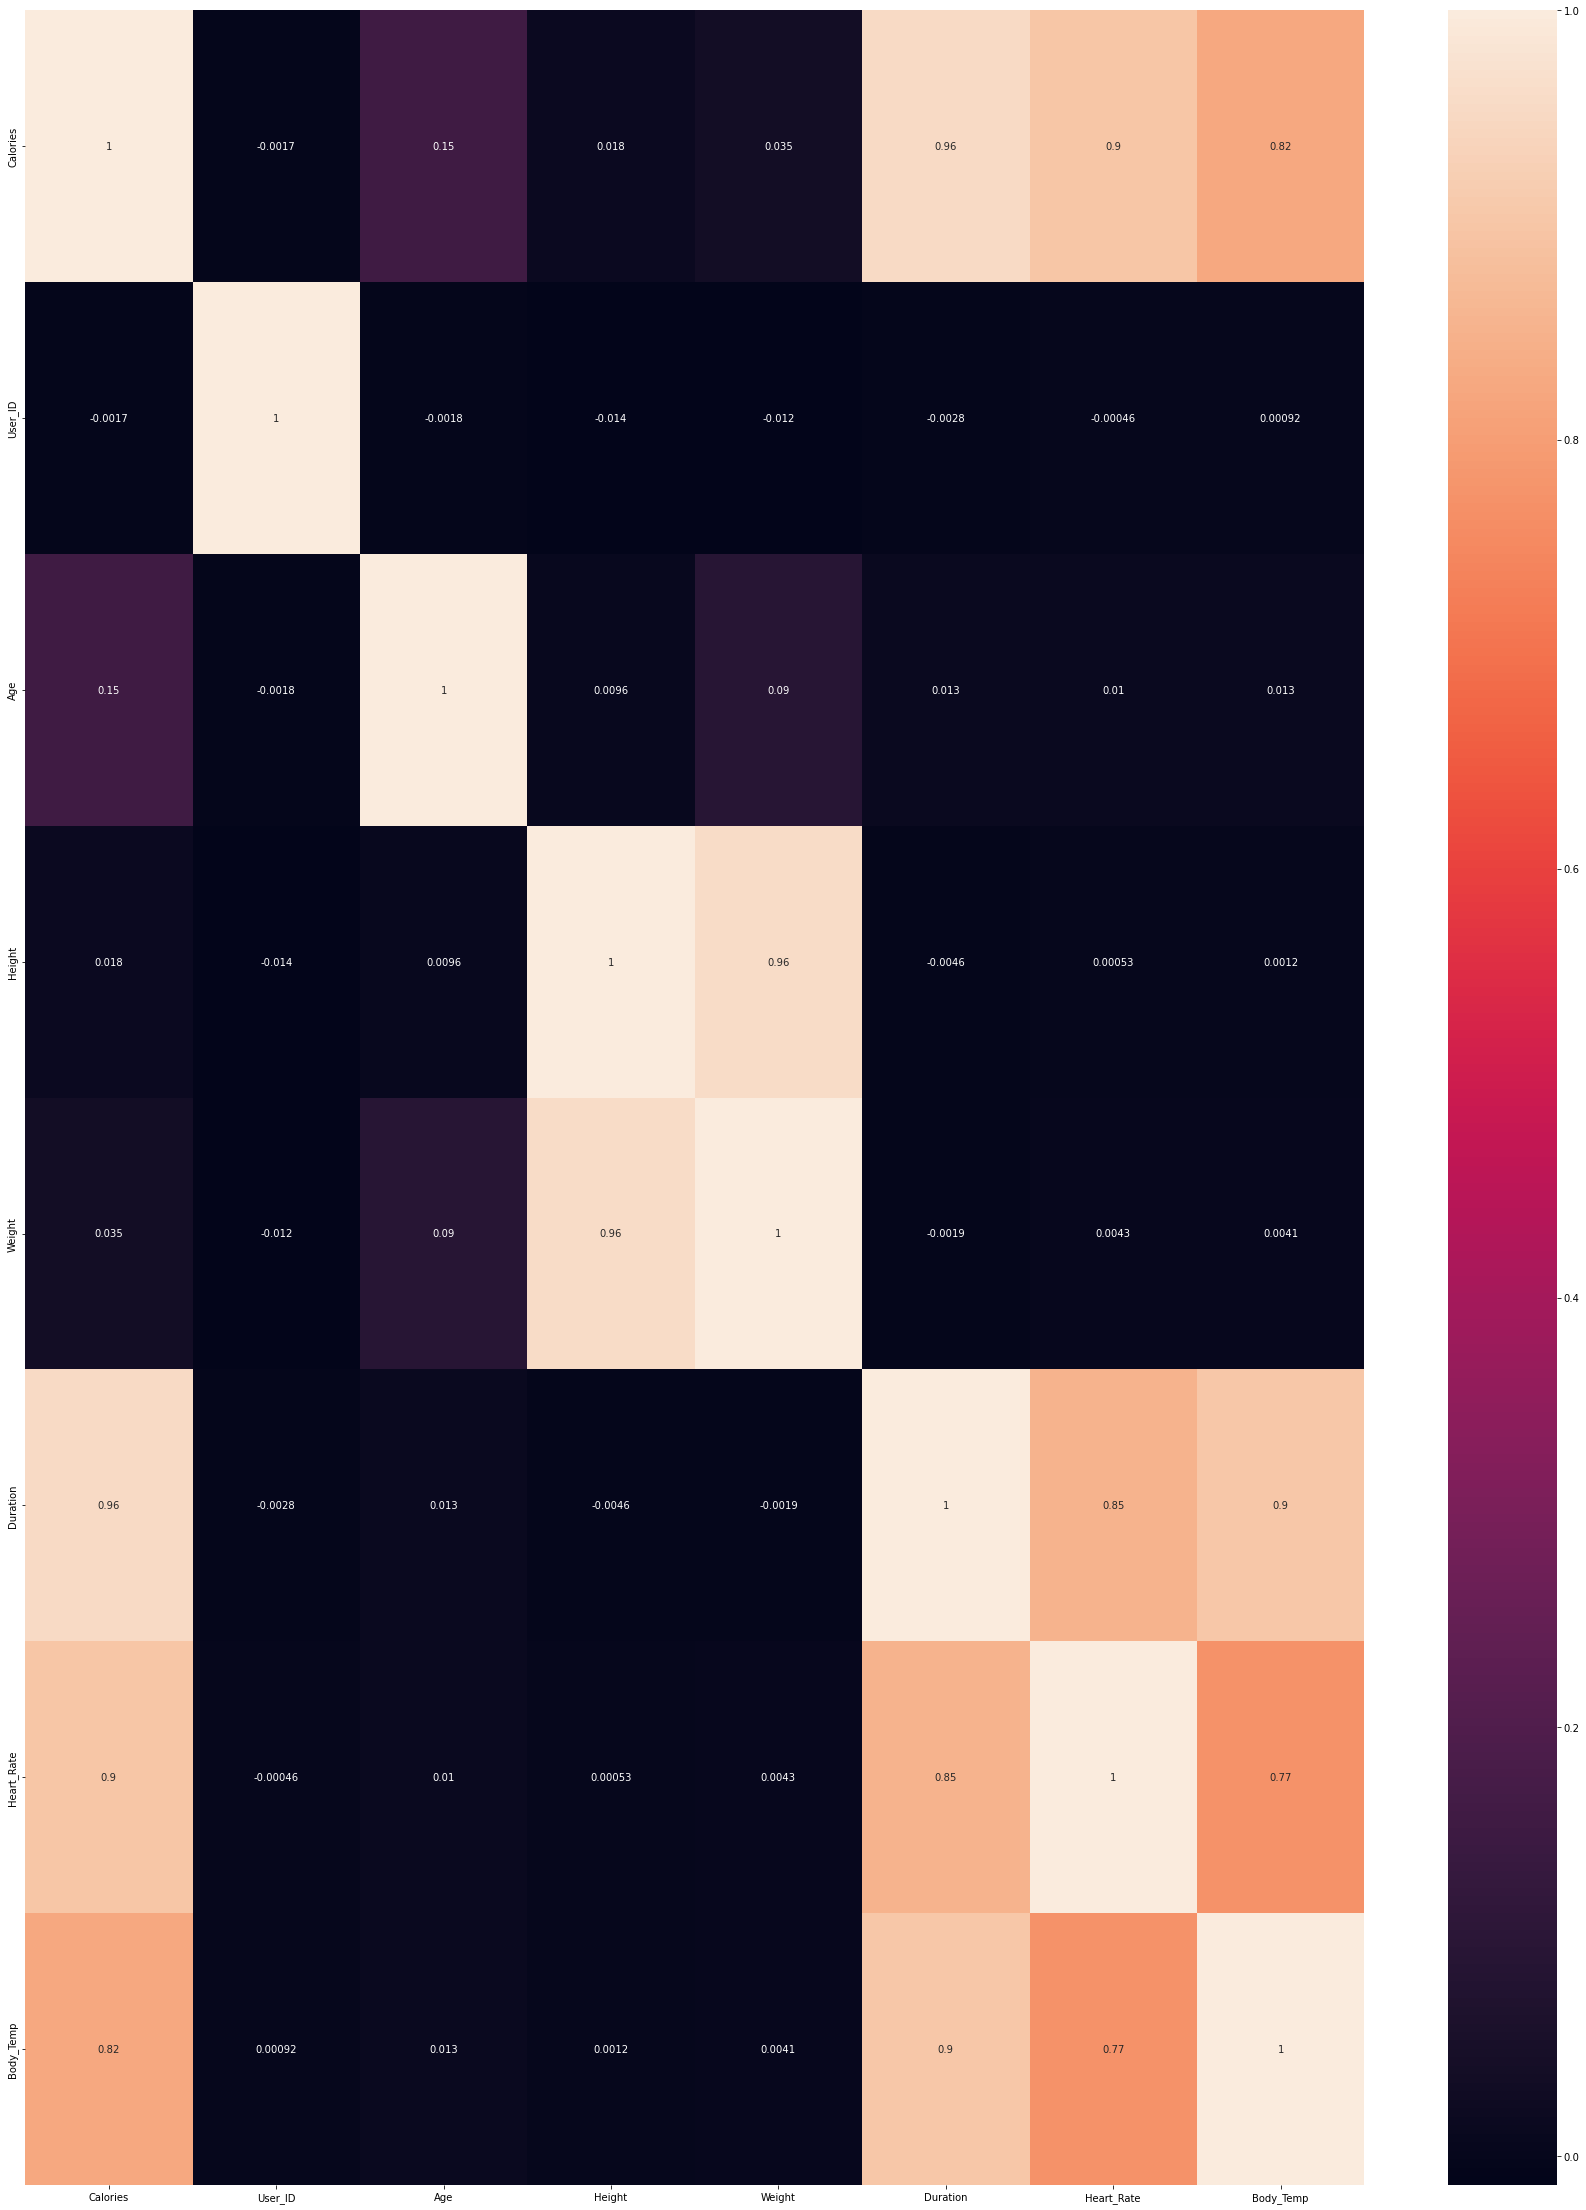

In [19]:
plt.figure(figsize=(30,40))

sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

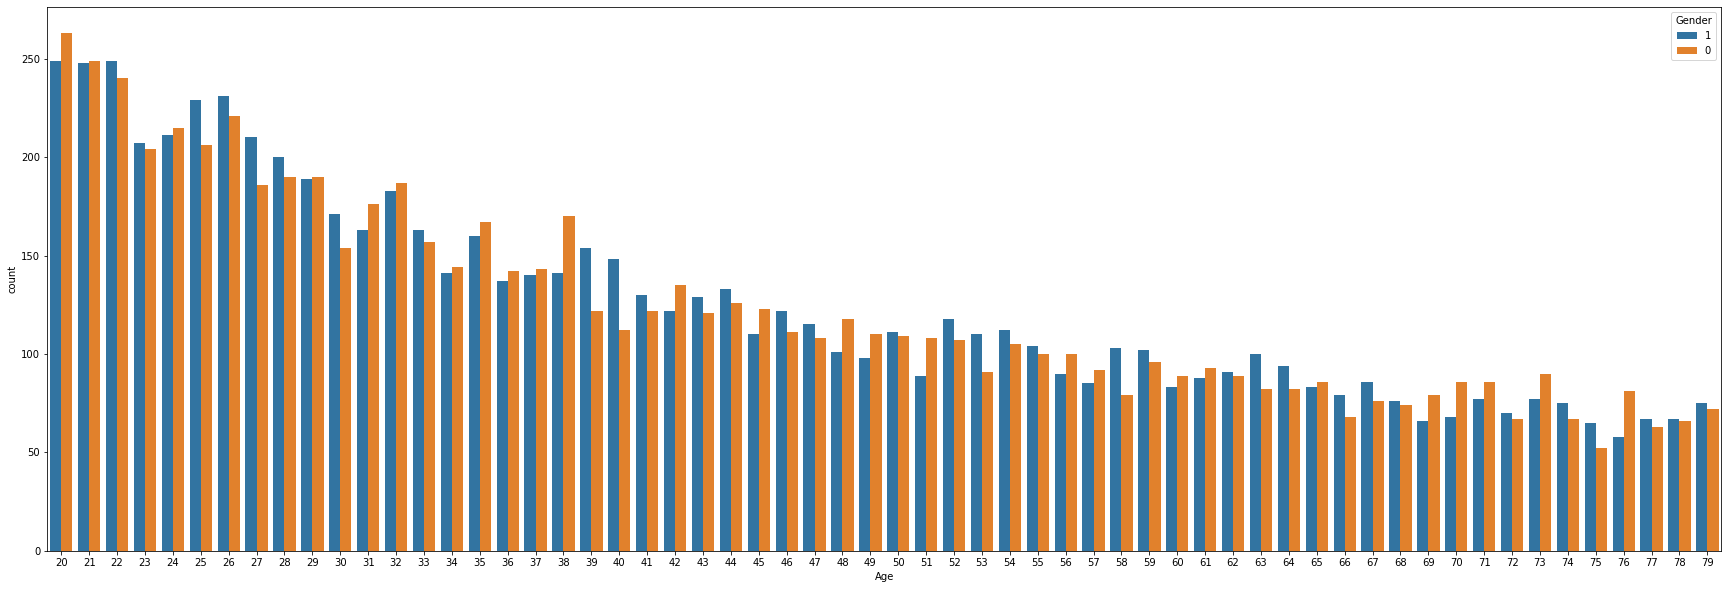

In [24]:
plt.figure(figsize=(30,10))
sns.countplot(x='Age',data = new_data,hue='Gender')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = new_data.drop(['Calories'],axis=1)
y = new_data['Calories']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [27]:
X

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3


In [29]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
pred = model.predict(X_test)

In [35]:
pred

array([170.43420044, 192.06029027,  56.27577917, ...,   9.00337126,
       171.02011214,  76.33382721])

Text(0, 0.5, 'Prediction')

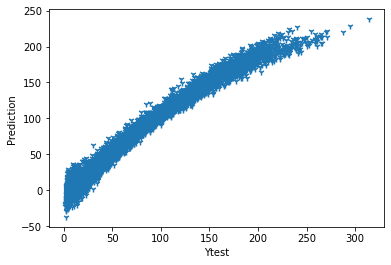

In [39]:
plt.scatter(y_test,pred,marker='1')
plt.xlabel('Ytest')
plt.ylabel('Prediction')

C:\Users\97798\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


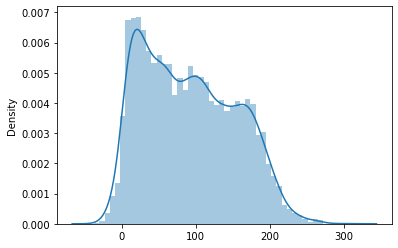

In [40]:
sns.distplot((y_test,pred),bins=50);

In [41]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.449292907486415
MSE: 132.9435806282534
RMSE: 11.53011624521858
